In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import data

In [5]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
df.shape

(28242, 7)

In [8]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [10]:
df.duplicated().sum()

2310

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [14]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# Data Exploration

## Graph frequency vs Area

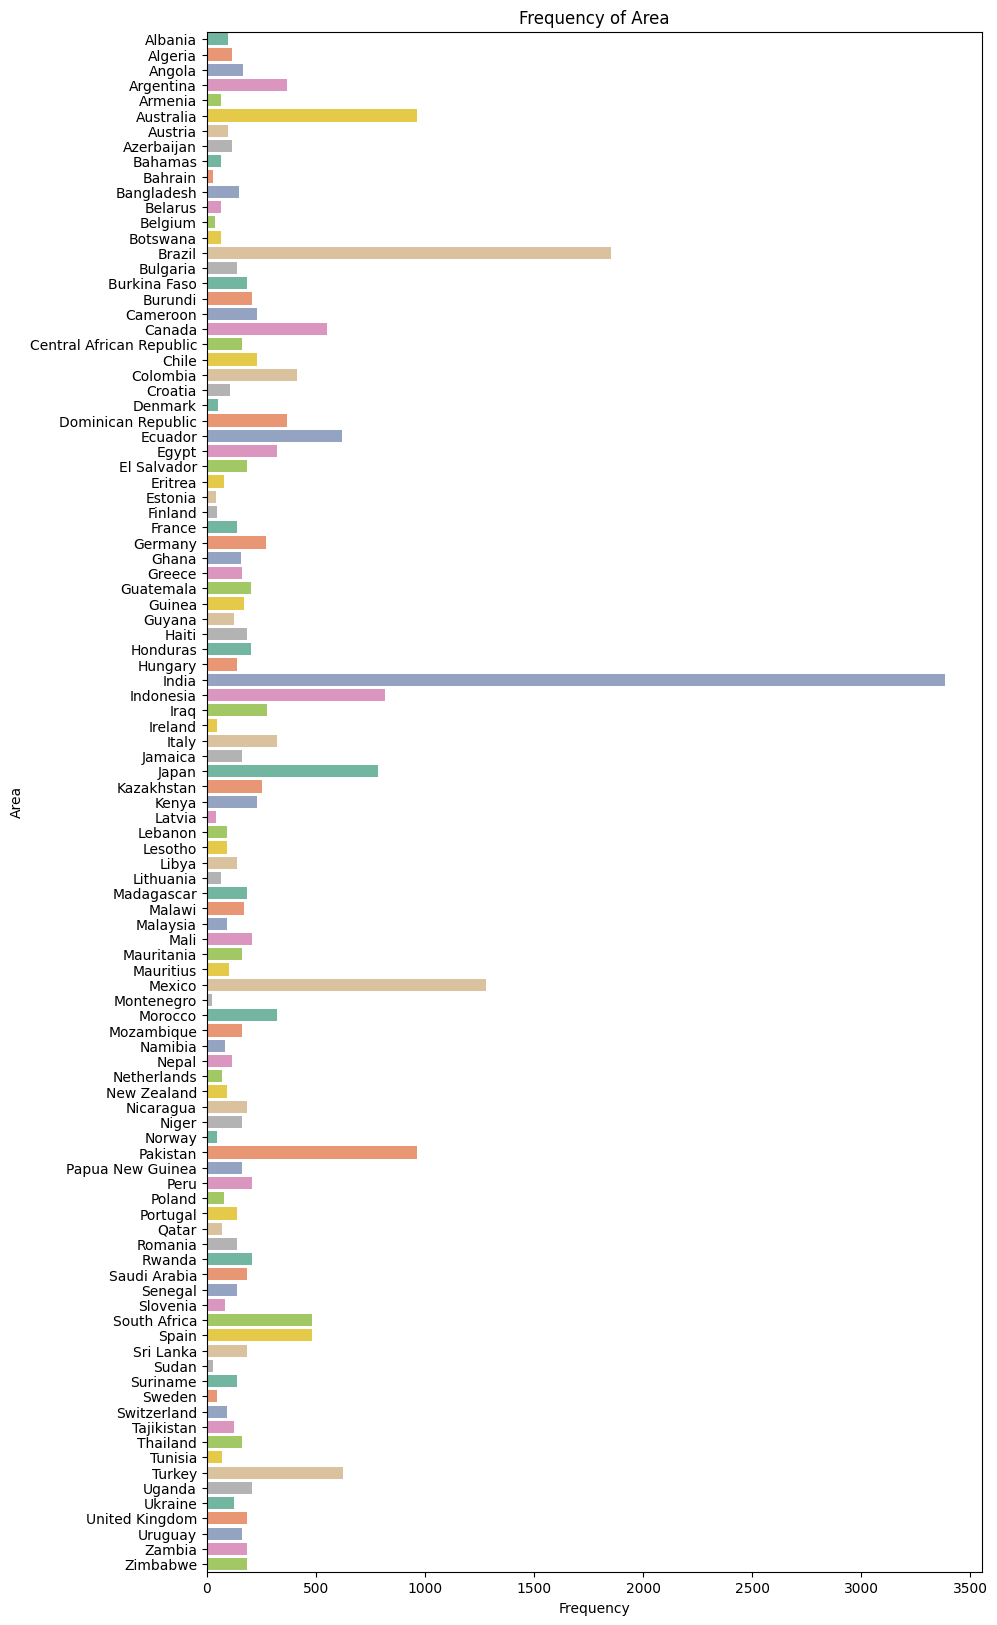

In [15]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'], palette='Set2')
plt.title('Frequency of Area')
plt.xlabel('Frequency')
plt.ylabel('Area')
plt.show()

## Yield per Country

In [16]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

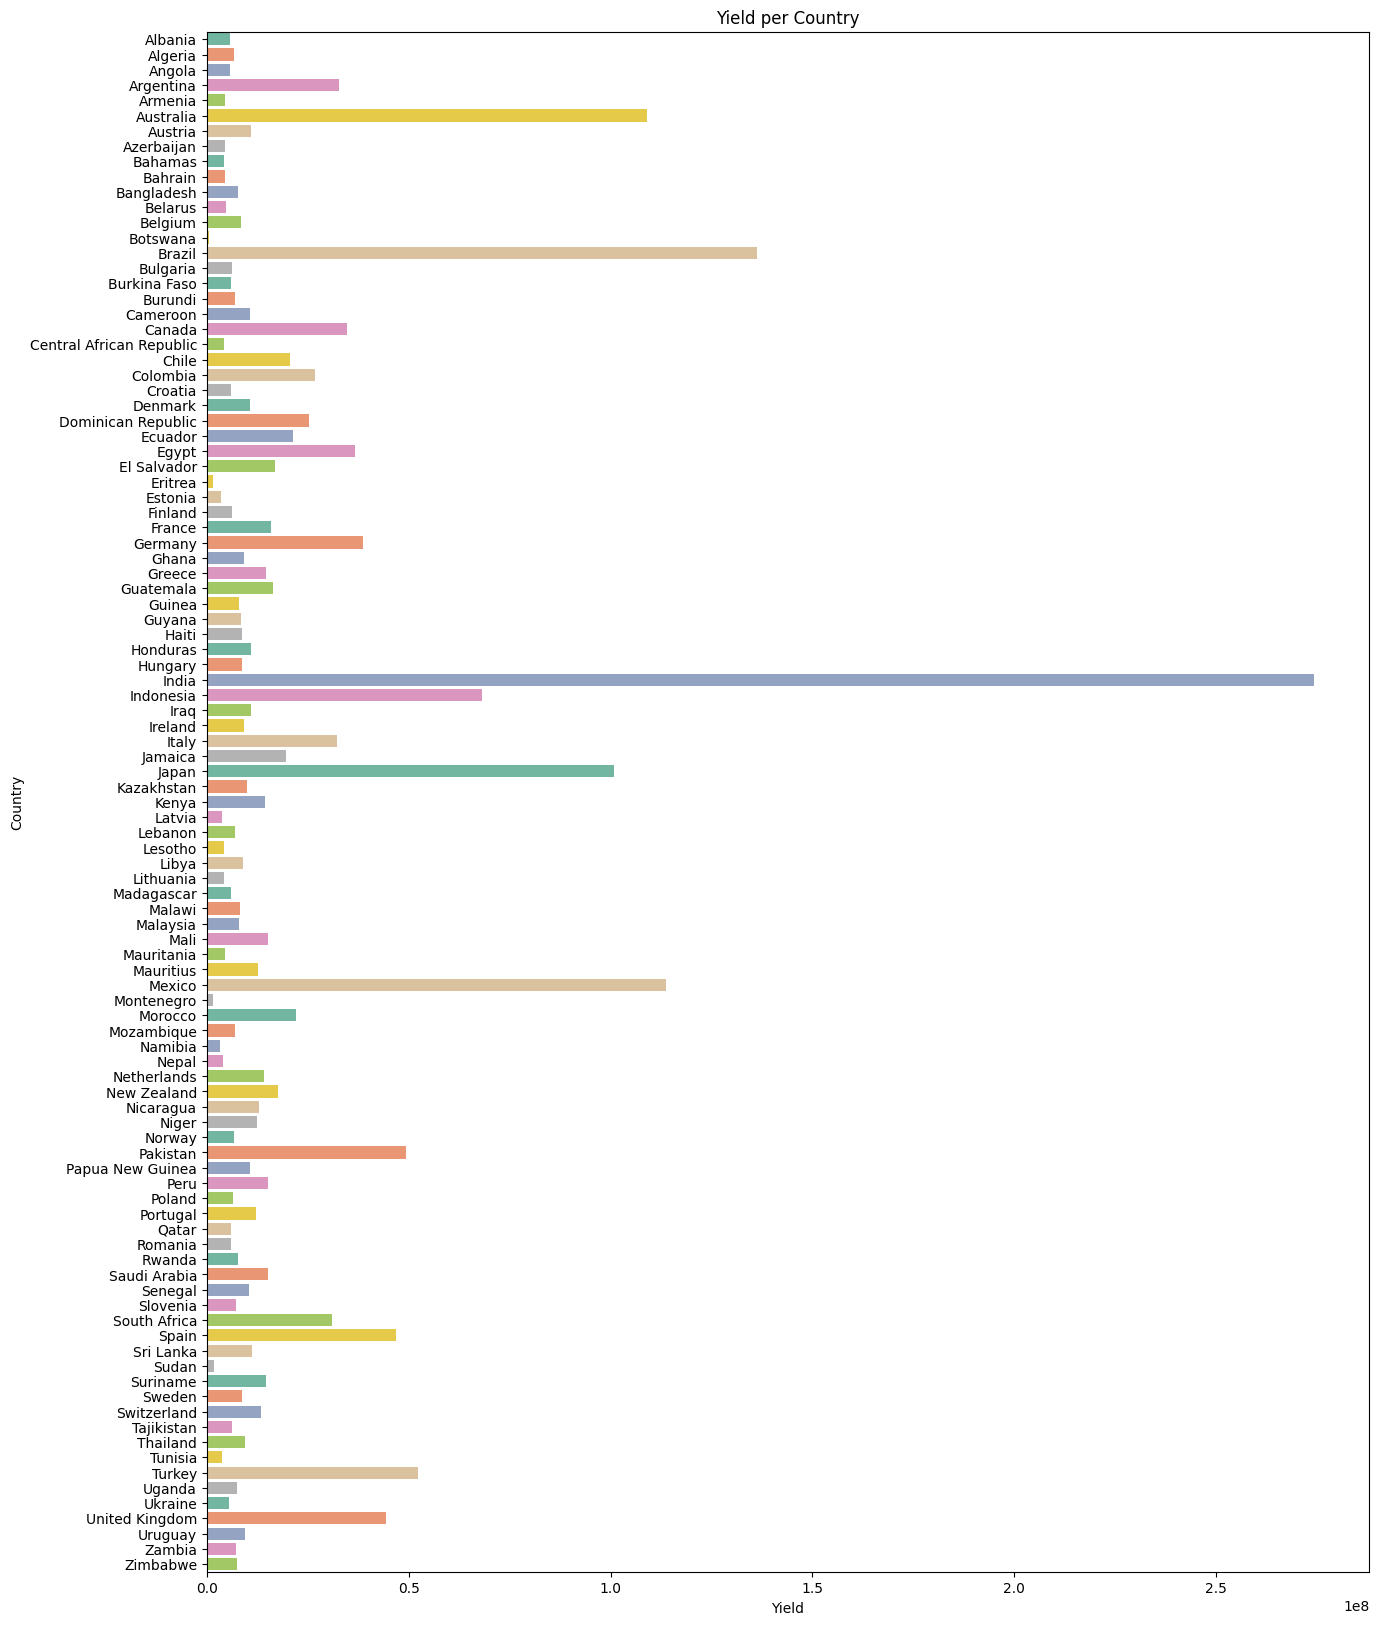

In [17]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country, palette='Set2')
plt.title('Yield per Country')
plt.xlabel('Yield')
plt.ylabel('Country')
plt.show()

## Item frequency

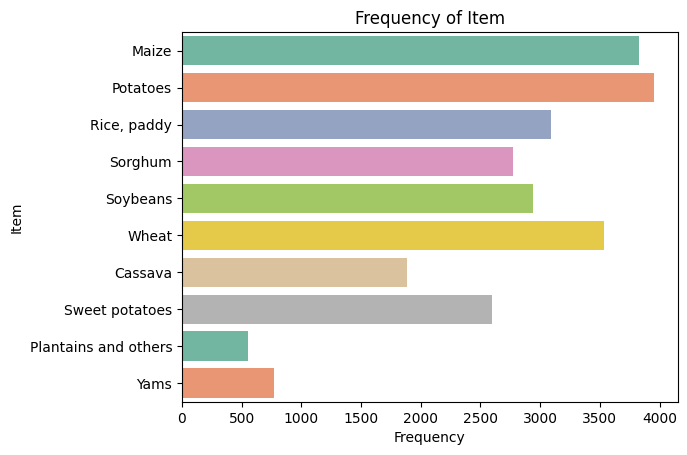

In [18]:
sns.countplot(y=df['Item'], palette='Set2')
plt.title('Frequency of Item')
plt.xlabel('Frequency')
plt.ylabel('Item')
plt.show()

## Yield of Item

In [19]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

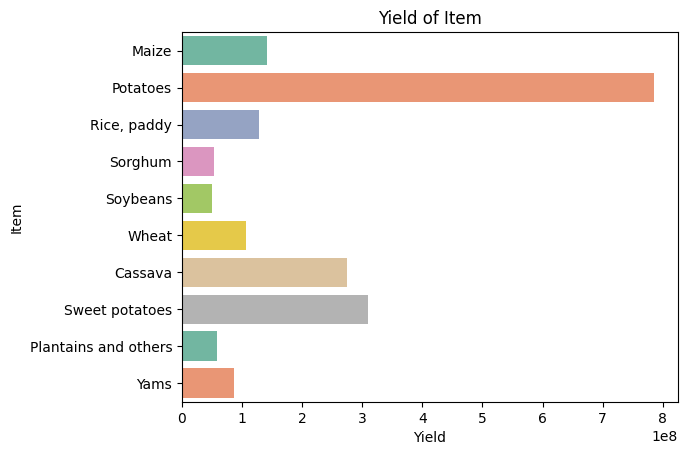

In [20]:
sns.barplot(y=crops, x=yield_per_crop, palette='Set2')
plt.title('Yield of Item')
plt.xlabel('Yield')
plt.ylabel('Item')
plt.show()

## Yield of Item per Country

In [21]:
countries = df['Area'].unique()
Yield_per_country = {}

for state in countries:
    Yield_per_country[state] = {}
    df_state = df[df['Area'] == state]
    for item in df_state['Item'].unique():
        df_item = df_state[df_state['Item'] == item]
        Yield_per_country[state][item] = df_item['hg/ha_yield'].sum()

Yield_per_country

{'Albania': {'Maize': 981290,
  'Potatoes': 3521416,
  'Rice, paddy': 133657,
  'Sorghum': 22914,
  'Soybeans': 326026,
  'Wheat': 726233},
 'Algeria': {'Maize': 667642,
  'Potatoes': 4195521,
  'Rice, paddy': 390078,
  'Sorghum': 1181995,
  'Wheat': 276228},
 'Angola': {'Cassava': 2076309,
  'Maize': 132339,
  'Potatoes': 1358972,
  'Rice, paddy': 248598,
  'Sweet potatoes': 1540430,
  'Wheat': 272805,
  'Sorghum': 38048,
  'Soybeans': 55062},
 'Argentina': {'Cassava': 4604308,
  'Maize': 2559916,
  'Potatoes': 12054722,
  'Rice, paddy': 2587532,
  'Sorghum': 1955992,
  'Soybeans': 1101276,
  'Sweet potatoes': 6879904,
  'Wheat': 1120382},
 'Armenia': {'Maize': 882689, 'Potatoes': 3172615, 'Wheat': 468796},
 'Australia': {'Maize': 7281966,
  'Potatoes': 45670386,
  'Rice, paddy': 11898462,
  'Sorghum': 3674754,
  'Soybeans': 2622804,
  'Sweet potatoes': 35550294,
  'Wheat': 2412396},
 'Austria': {'Maize': 2173173,
  'Potatoes': 6694335,
  'Soybeans': 558562,
  'Wheat': 1170695,
  'Sor

In [22]:
# yield category
yields = df['Item'].unique()
yields

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [23]:
yields_dict = {}

for item in yields:
    yields_dict[f"{item}_yield"] = []

    for state in countries:
        quantity = Yield_per_country.get(state, {}).get(item)
        yields_dict[f"{item}_yield"].append(quantity)

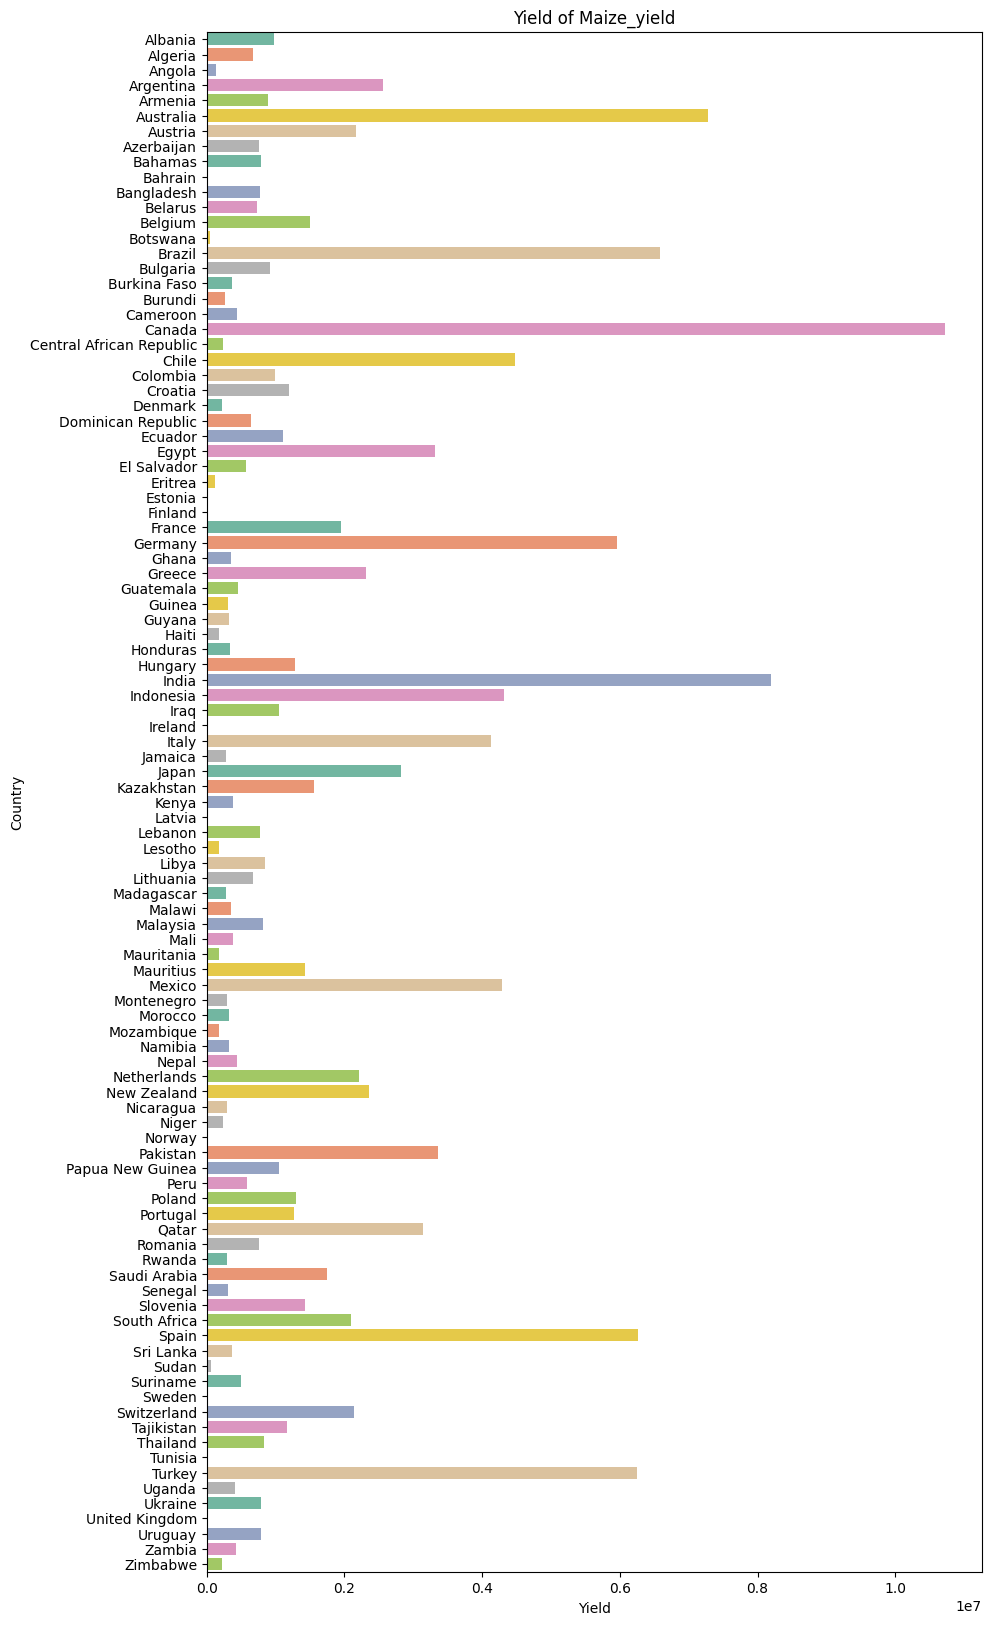

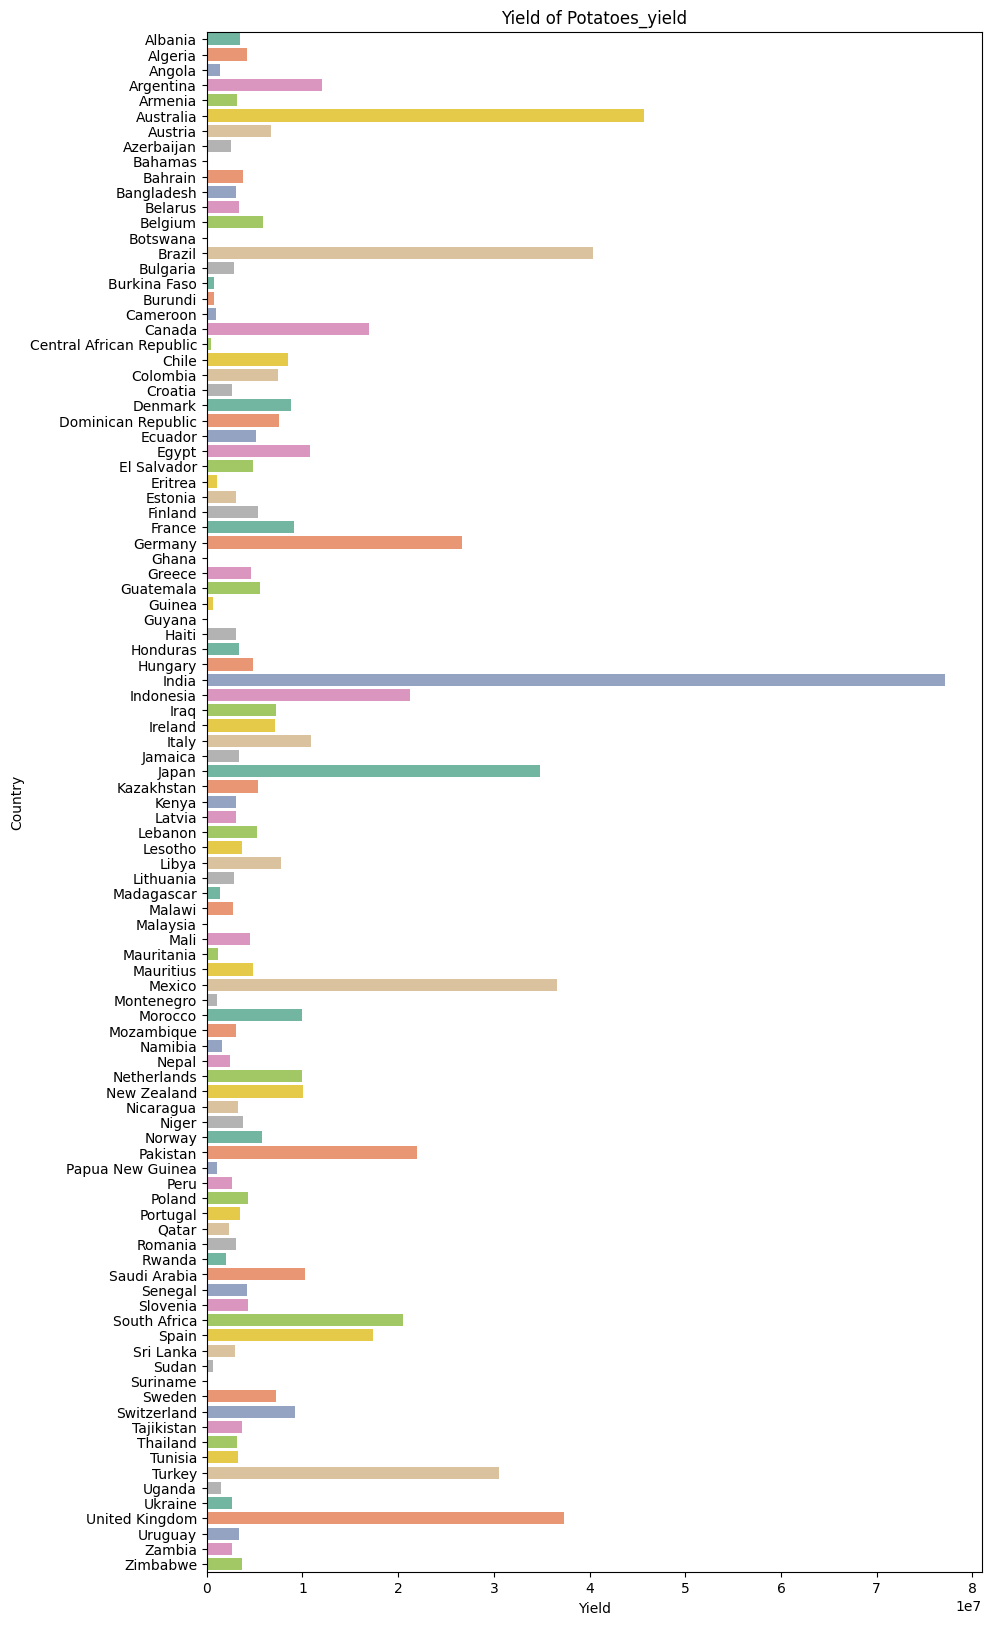

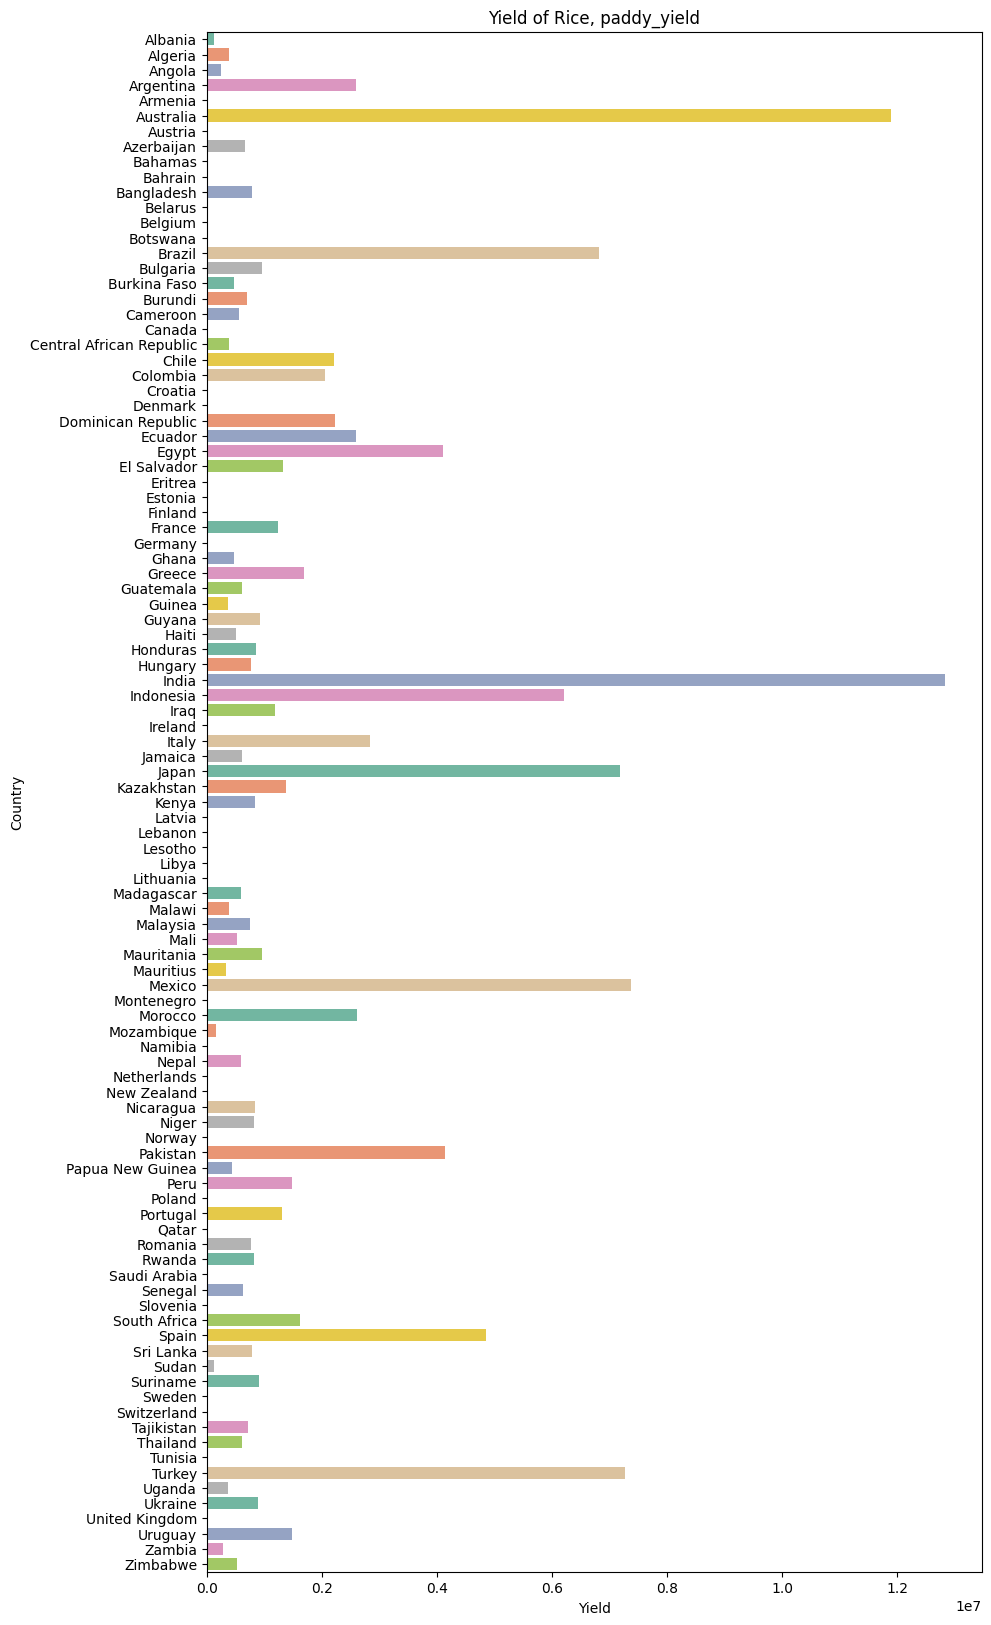

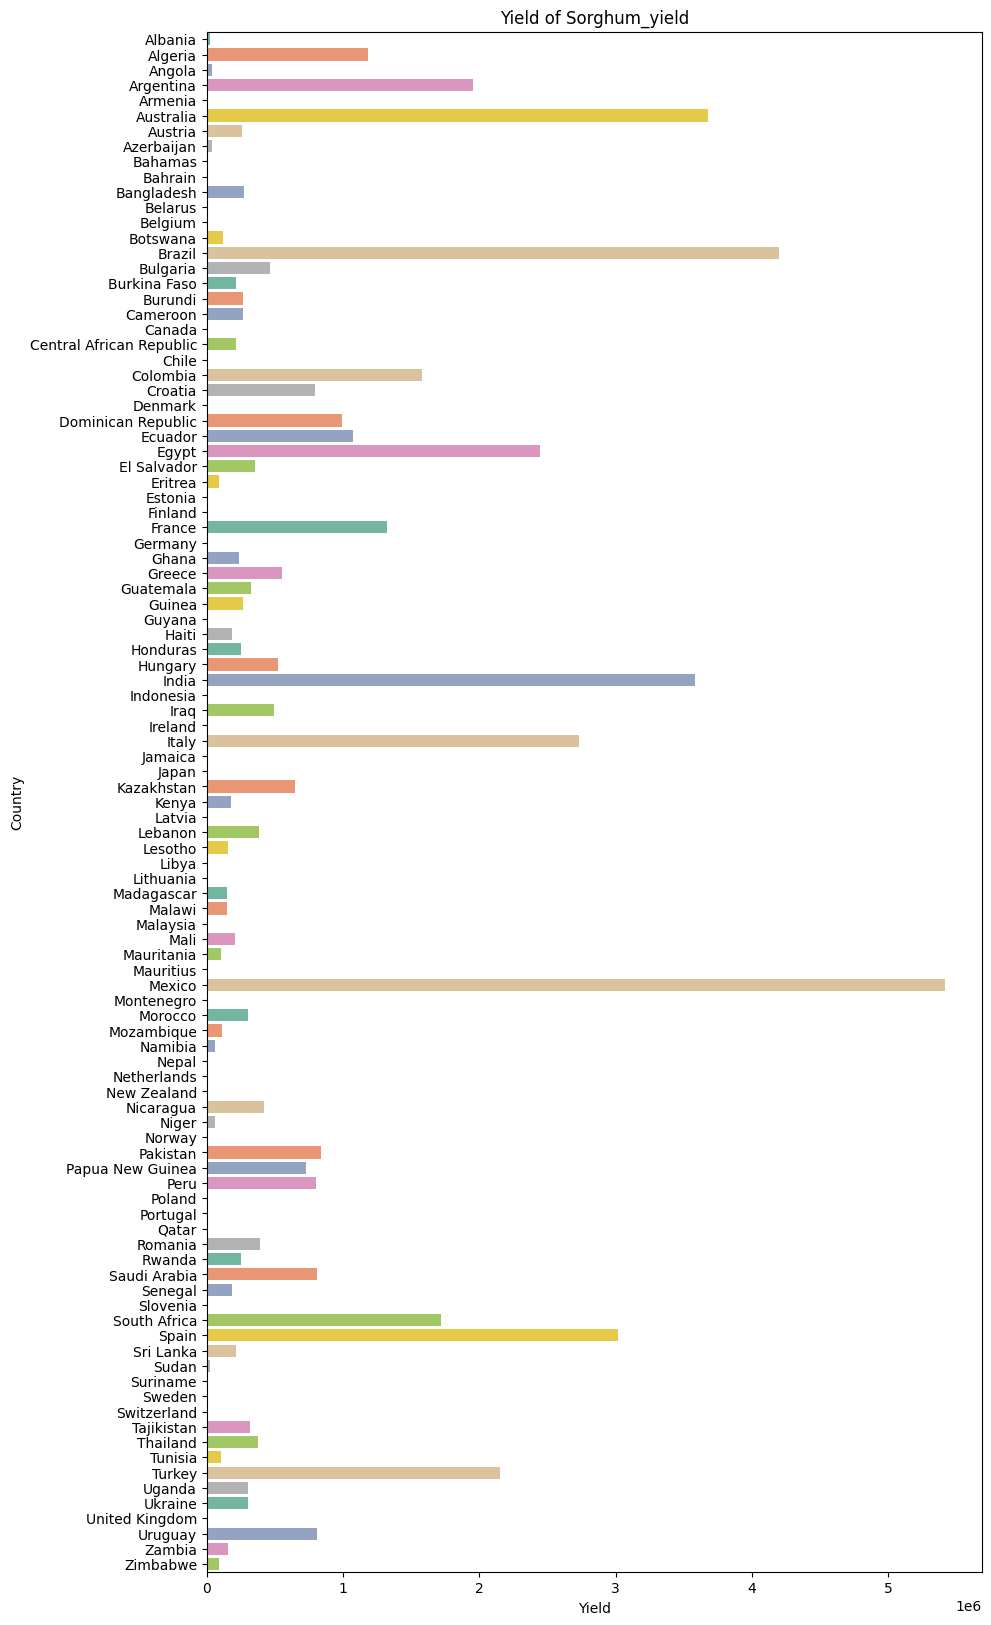

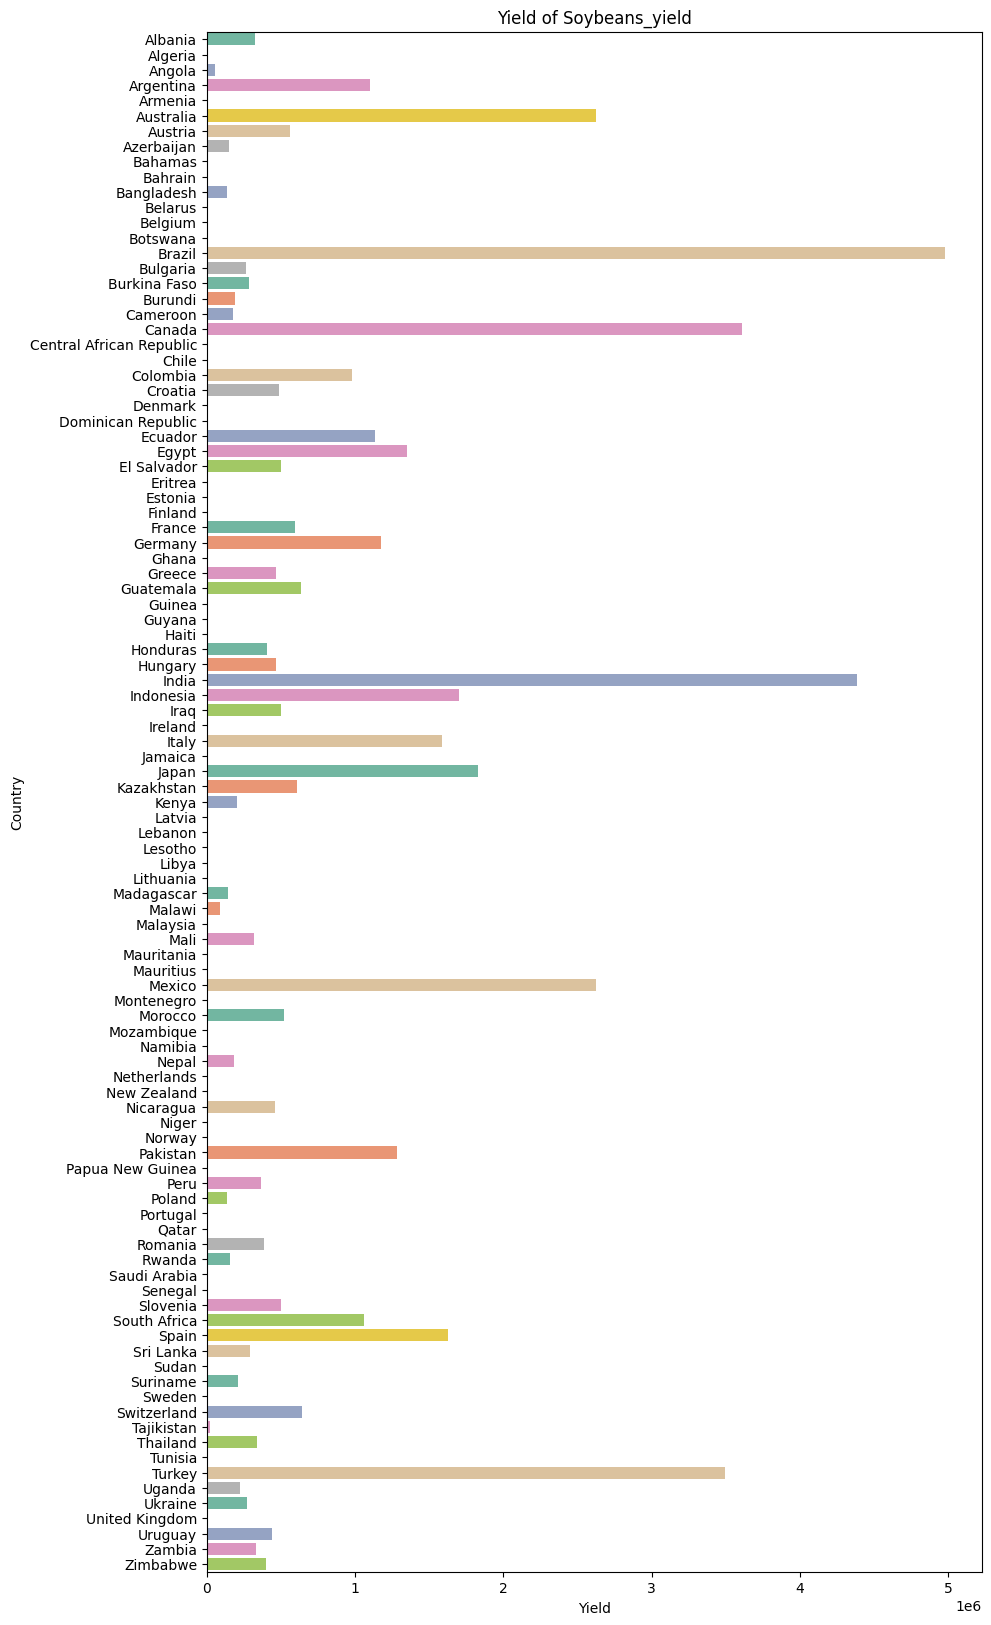

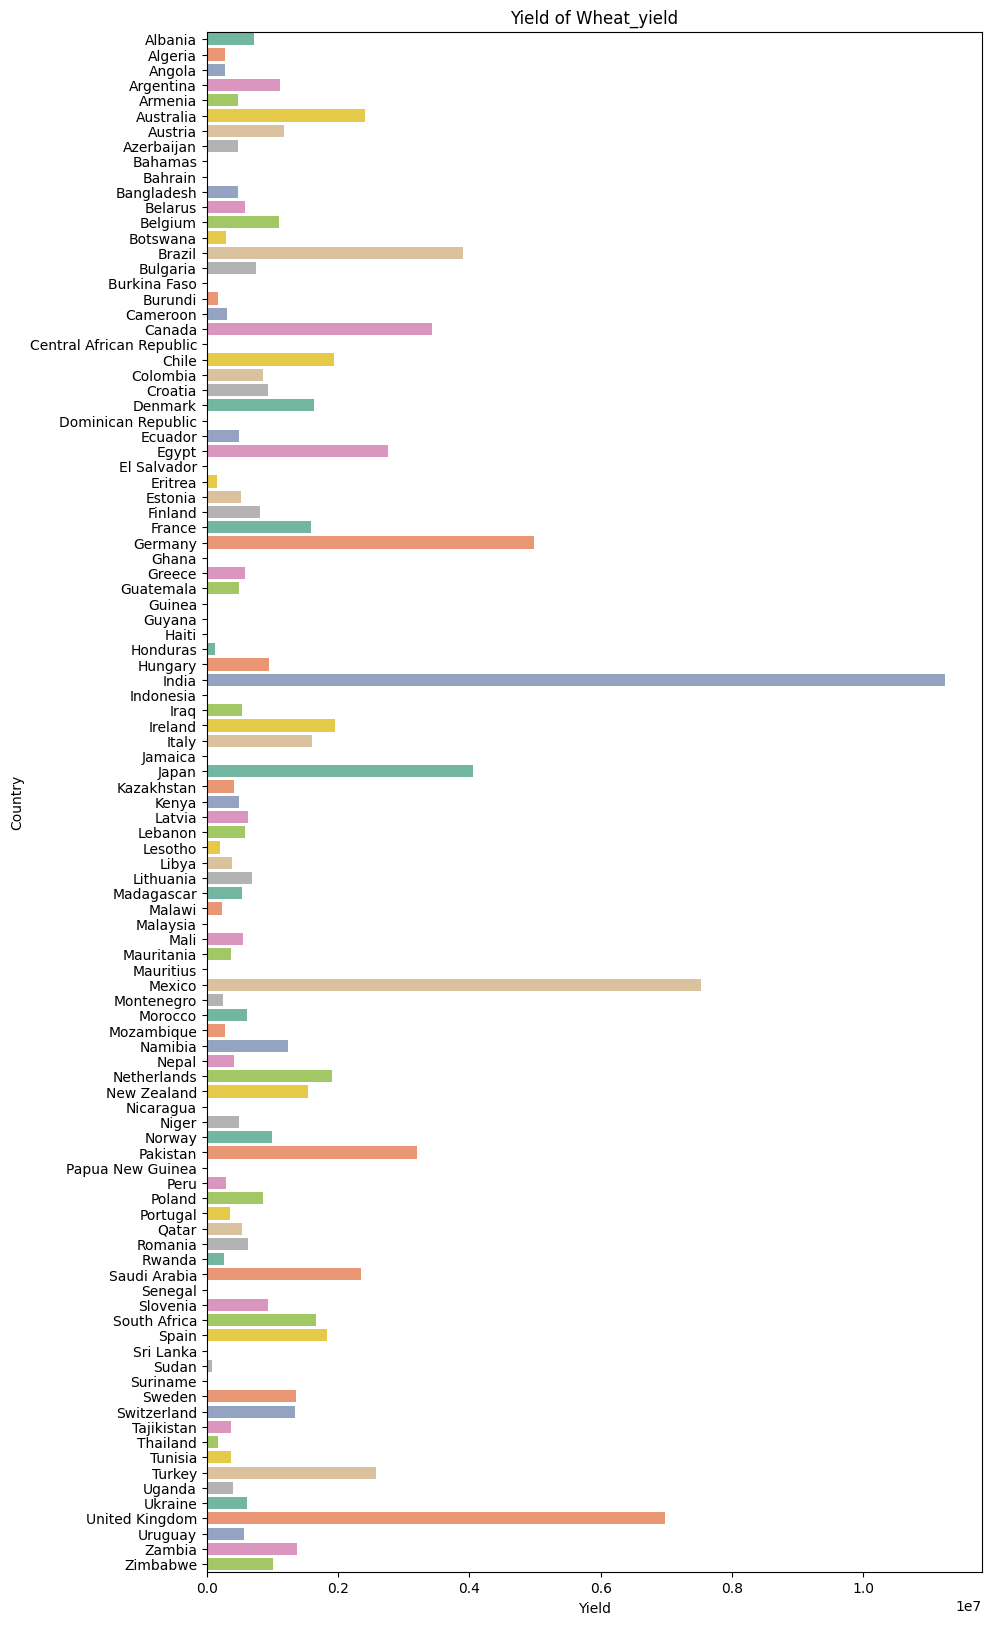

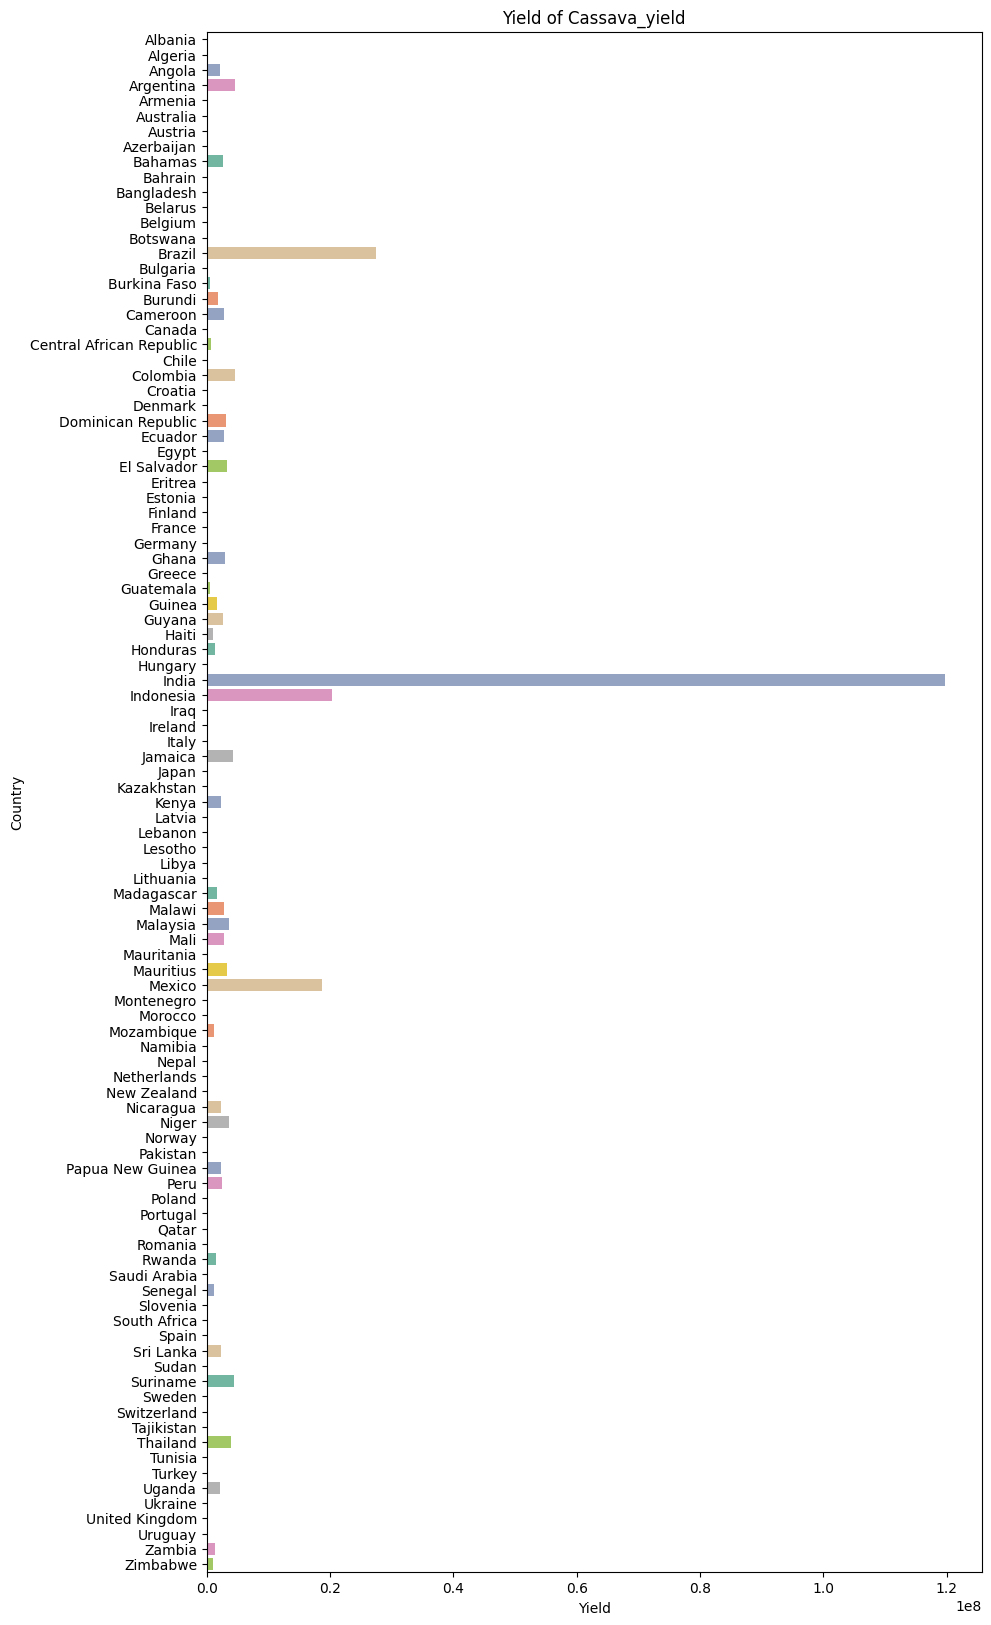

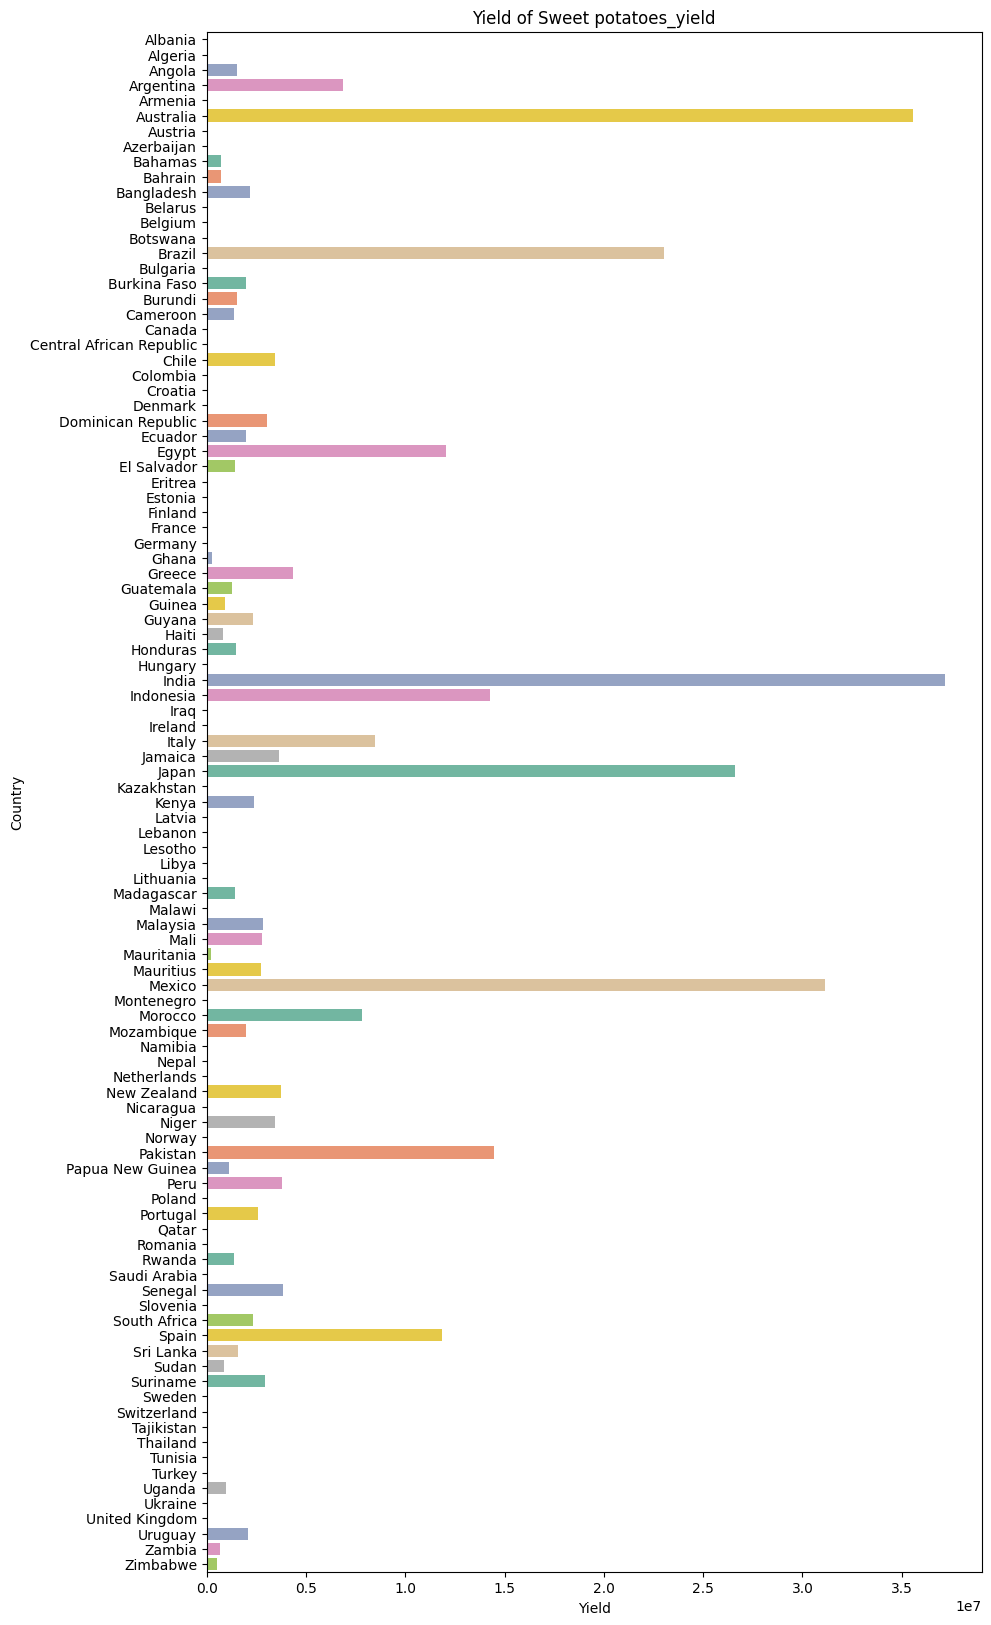

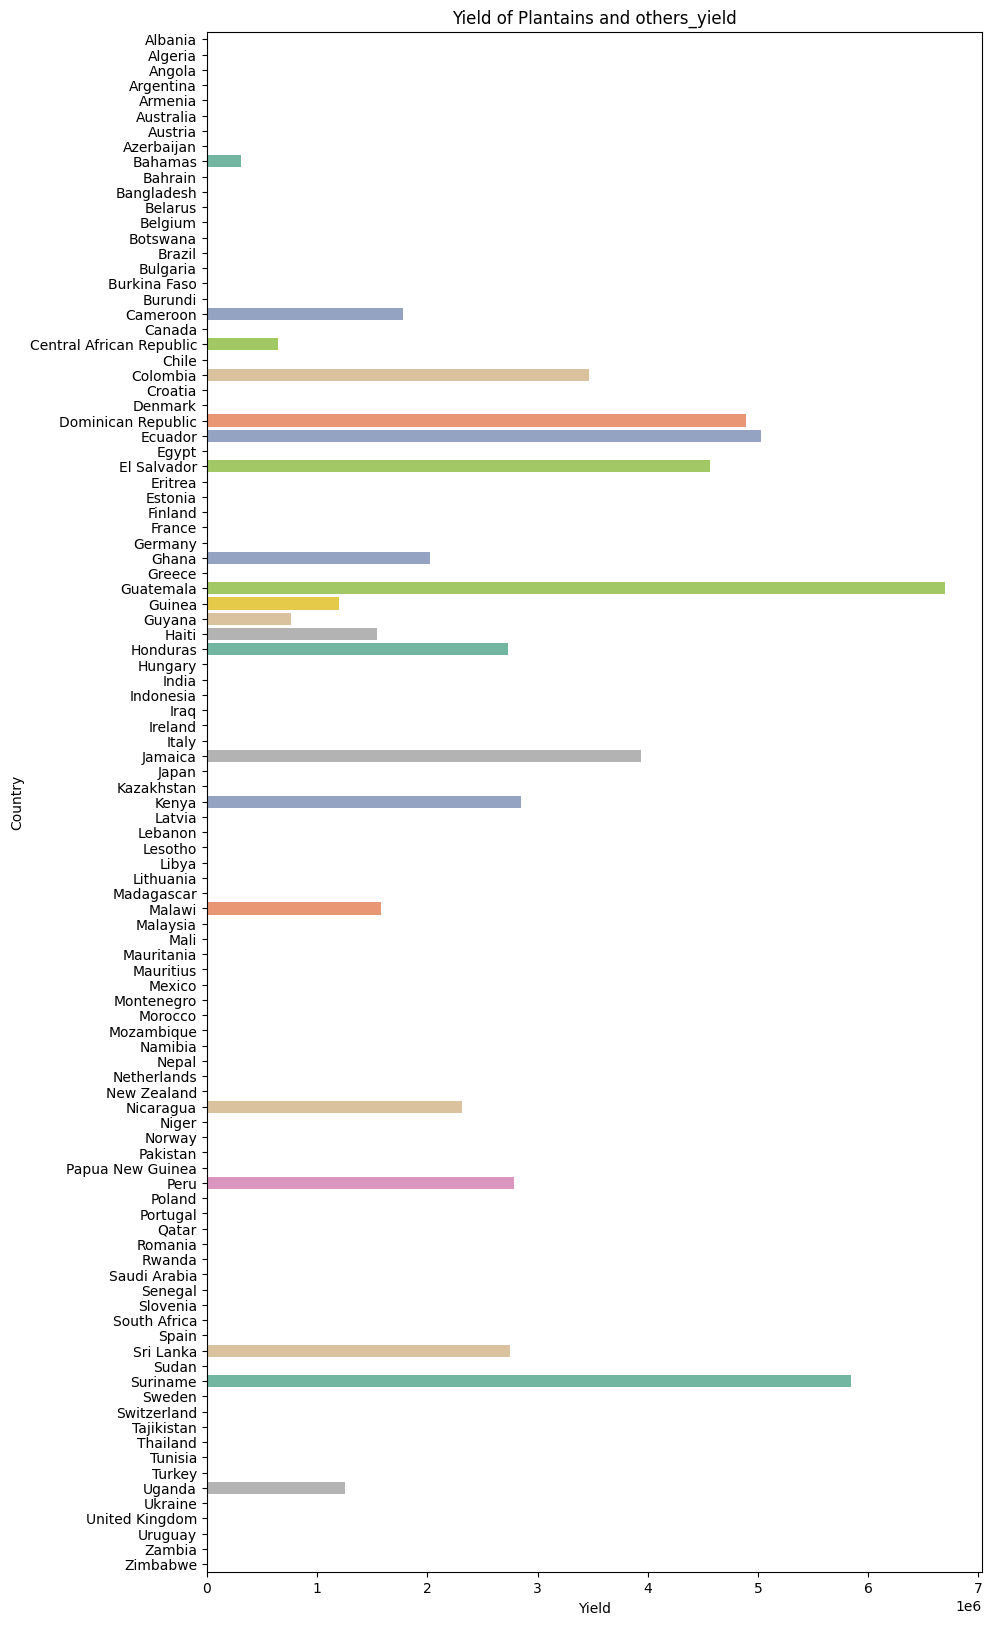

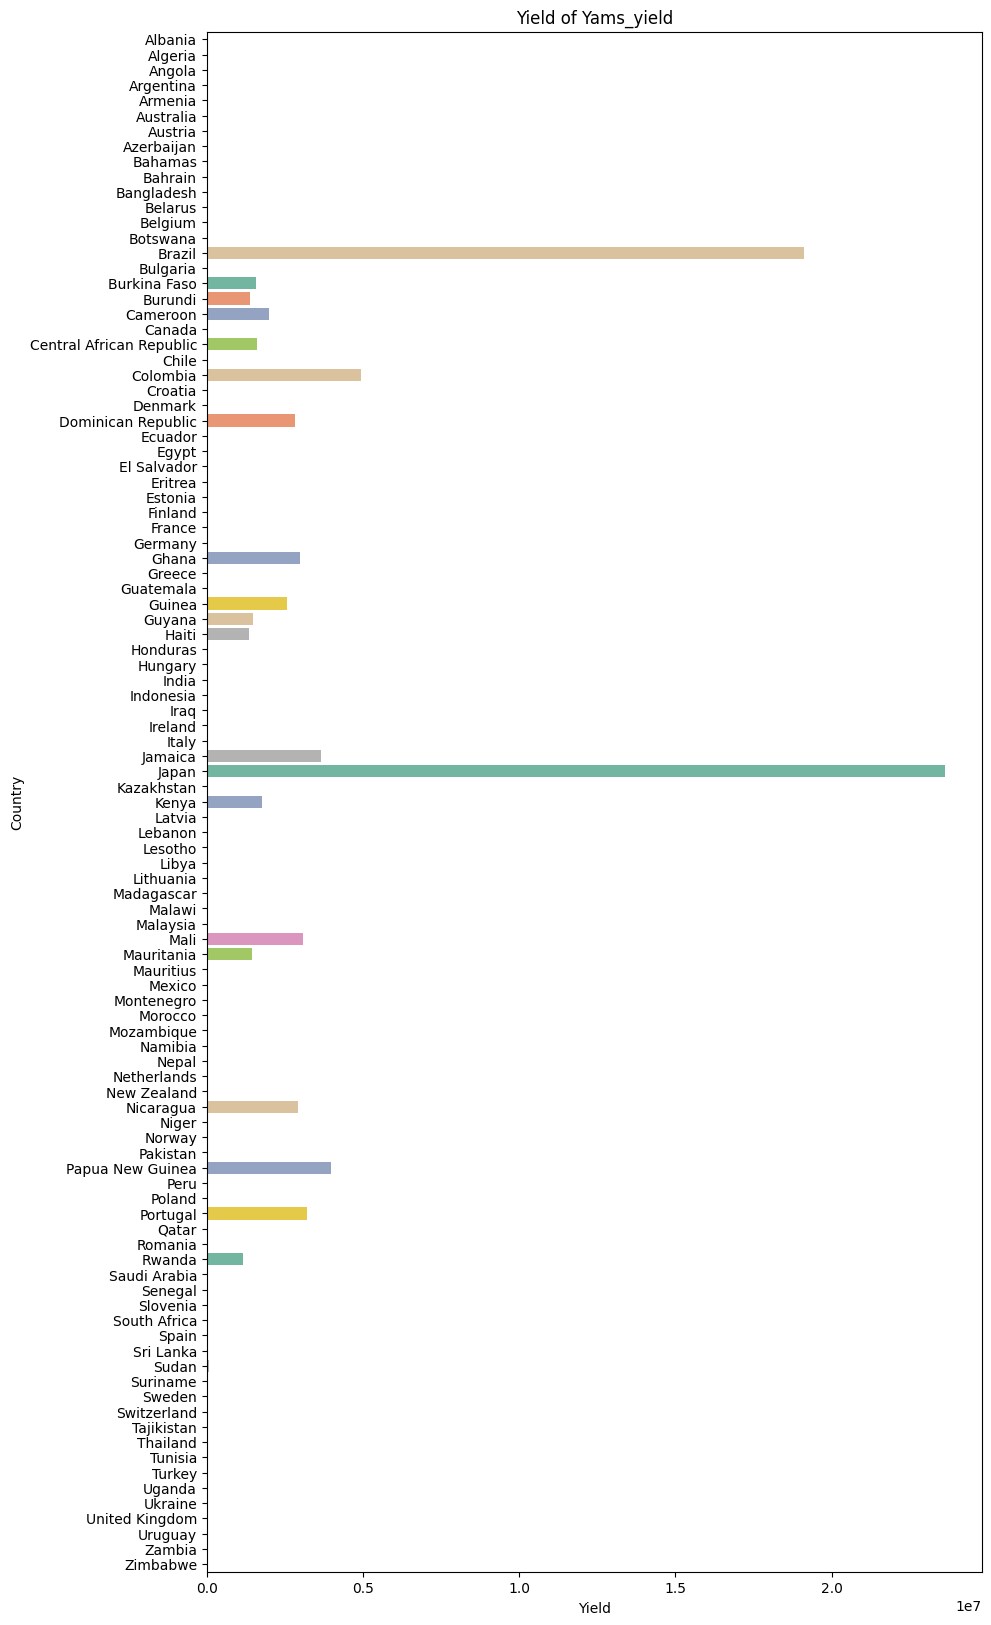

In [24]:
for yields, yield_val in yields_dict.items():
    plt.figure(figsize=(10, 20))
    sns.barplot(x=yield_val, y=countries, palette='Set2')
    plt.title(f'Yield of {yields}')
    plt.xlabel('Yield')
    plt.ylabel('Country')
    plt.show()

# Train test split

In [25]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [26]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

In [42]:
preprocessor = ColumnTransformer(
    transformers = [
        ('OneHotEncoder', ohe, ['Area', 'Item']),
        ('StandardScaler', scale, ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])
    ],
    remainder='passthrough'
)

In [43]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['Area', 'Item']),
                                ('StandardScaler', StandardScaler(),
                                 ['Year', 'average_rain_fall_mm_per_year',
                                  'pesticides_tonnes', 'avg_temp'])])

In [44]:
X_train.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
4907,2005,608.0,2232.25,8.58,Bulgaria,Soybeans
10399,1995,589.0,7715.00,10.34,Hungary,Wheat
23617,1993,854.0,8985.00,15.33,Portugal,"Rice, paddy"
16174,2012,2051.0,909.71,27.51,Jamaica,Sweet potatoes
9077,2007,700.0,40740.64,10.88,Germany,Maize


In [45]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [46]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122865 stored elements in Compressed Sparse Row format>

In [47]:
preprocessor.get_feature_names_out(col[:-1])

array(['OneHotEncoder__Area_Algeria', 'OneHotEncoder__Area_Angola',
       'OneHotEncoder__Area_Argentina', 'OneHotEncoder__Area_Armenia',
       'OneHotEncoder__Area_Australia', 'OneHotEncoder__Area_Austria',
       'OneHotEncoder__Area_Azerbaijan', 'OneHotEncoder__Area_Bahamas',
       'OneHotEncoder__Area_Bahrain', 'OneHotEncoder__Area_Bangladesh',
       'OneHotEncoder__Area_Belarus', 'OneHotEncoder__Area_Belgium',
       'OneHotEncoder__Area_Botswana', 'OneHotEncoder__Area_Brazil',
       'OneHotEncoder__Area_Bulgaria', 'OneHotEncoder__Area_Burkina Faso',
       'OneHotEncoder__Area_Burundi', 'OneHotEncoder__Area_Cameroon',
       'OneHotEncoder__Area_Canada',
       'OneHotEncoder__Area_Central African Republic',
       'OneHotEncoder__Area_Chile', 'OneHotEncoder__Area_Colombia',
       'OneHotEncoder__Area_Croatia', 'OneHotEncoder__Area_Denmark',
       'OneHotEncoder__Area_Dominican Republic',
       'OneHotEncoder__Area_Ecuador', 'OneHotEncoder__Area_Egypt',
       'OneHotEnco

# Train Model

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [49]:
models = {
    'lr': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'knn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor()
}

In [50]:
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    print(f'{name}: {r2_score(y_test, y_pred)}')
    print(f'{name}: {mean_absolute_error(y_test, y_pred)}')

lr: 0.747312956617473
lr: 29907.49948397384
ridge: 0.7473042801811424
ridge: 29864.797606148783
lasso: 0.7473260591695889
lasso: 29893.989846454264
knn: 0.9849406762885614
knn: 4618.005128205128
dt: 0.9796252989747015
dt: 3949.292654713707


In [51]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 23359., 34879., 77391.])

# Predict model

In [56]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = pd.DataFrame({
        'Year': [Year],
        'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp],
        'Area': [Area],
        'Item': [Item]
    })

    # Transform the features using the preprocessor
    transformed_features = preprocessor.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
result

array([36613.])

In [57]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))